### 1. Importamos las librerias que vamos a necesitar

In [1]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

### 2.Utilizamos la función "pd.read_csv" de pandas para leer un archivo CSV con el nombre "attacks.csv"

In [2]:
data = pd.read_csv('../data/attacks.csv', encoding = "ISO-8859-1")

### 3.Miramos la información de nuestro dataframe con distintas funciones.

In [3]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
data.shape

(25723, 24)

In [5]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### 4. Pasamos a extraer información sobre los nulos que tenemos por columnas y duplicados.

In [7]:
nan_cols = data.isna().sum() #Suma de todos los nulos por columna

nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
 data.describe(include='all').T #Nor puede servir para dientificar si existen duplicados

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,8702,6287,0,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
Type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. Para dibujar una figura que nos indique informacion de los valores nulos.


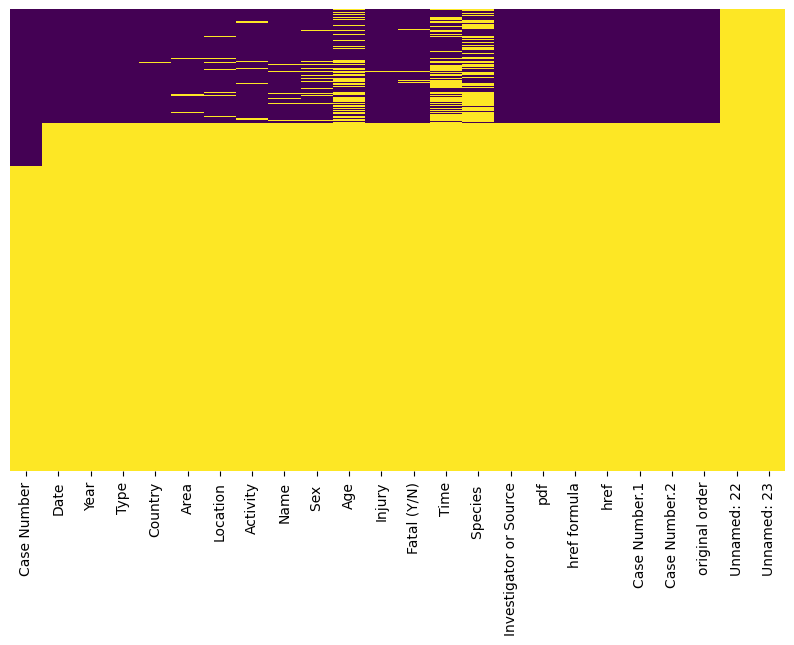

In [9]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

### 6. Cambiamos el nombre de las columnas 'Species ' y 'Sex ' para eliminar el espacio.

In [10]:
data.rename(columns={'Species ':'Species',
                        'Sex ':'Sex'},
               inplace=True)
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [11]:
data.isna()    #Por curiosear

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


### 7.Para ver si todos los valores de algunas filas son NaN.

In [12]:
null_rows = data[data.isnull().all(axis=1)] #Saca todas las filas cuyos valores son en su totalidad  nulos
data.isnull().all

<bound method NDFrame._add_numeric_operations.<locals>.all of        Case Number   Date   Year   Type  Country   Area  Location  Activity  \
0            False  False  False  False    False  False     False     False   
1            False  False  False  False    False  False     False     False   
2            False  False  False  False    False  False     False     False   
3            False  False  False  False    False  False     False     False   
4            False  False  False  False    False  False     False     False   
...            ...    ...    ...    ...      ...    ...       ...       ...   
25718         True   True   True   True     True   True      True      True   
25719         True   True   True   True     True   True      True      True   
25720         True   True   True   True     True   True      True      True   
25721         True   True   True   True     True   True      True      True   
25722        False   True   True   True     True   True      True    

### 8. Eliminamos todas las filas cuyos valores sean en su totalidad nulos y miramos como nos queda todo.


In [13]:
data = data.dropna(how='all') #Elimino todas las filas cuyos valores sean en su totalidad nulos

In [14]:
data.shape

(8703, 24)

In [15]:
nan_cols = data.isna().sum()

nan_cols[nan_cols>0]

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

### 9.Buscamos si hay duplicados, los eliminamos y lo volvemos a checkear.

In [16]:
data.duplicated().any() #Buscamos si hay algun valor duplicado

True

In [17]:
data = data.drop_duplicates(keep=False)  #Eliminamos las filas con valores duplicados

In [18]:
data.duplicated().any()

False

In [19]:
data.shape

(6310, 24)

In [20]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [21]:
data.tail(20)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6290,ND.0012,Before 19-Jul-1913,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,"FATAL, leg stripped of flesh",Y,NaN,NaN,"Rural New Yorker, 7/19/1913",ND-0012-Durban-Scotsman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0012,ND.0012,13.0,NaN,NaN
6291,ND.0011,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,NaN,Foot severed,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",ND-0011-Masury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0011,ND.0011,12.0,NaN,NaN
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0,NaN,NaN
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,NaN,NaN
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0,NaN,NaN
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN


In [22]:
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

Case Number                  1
Date                         8
Year                        10
Type                        12
Country                     58
Area                       463
Location                   548
Activity                   552
Name                       218
Sex                        573
Age                       2839
Injury                      36
Fatal (Y/N)                547
Time                      3362
Species                   2846
Investigator or Source      25
pdf                          8
href formula                 9
href                         8
Case Number.1                8
Case Number.2                8
original order               1
Unnamed: 22               6309
Unnamed: 23               6308
dtype: int64

### 10.Eliminamos las filas que contienen al menos 6 valores faltantes en cualquier columna y volvemos a checkear como siempre.


In [23]:
data = data.dropna(thresh=(data.shape[1] - 6)) #Quitamos las filas que tengan mas del 50% de NaN ya que no podremos hacer nada con ellas y no es significativo

In [24]:
data.shape

(5874, 24)

### Intento salvar los valores de la columna Year con Date pero me está siendo imposible

In [25]:
data.Year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [26]:
data[['Date','Year']][data.Year == 0]

,Date,Year
6178,Ca. 336.B.C..,0.0
6179,493 B.C.,0.0
6180,Ca. 725 B.C.,0.0
6181,Before 1939,0.0
6182,1990 or 1991,0.0
...,...,...
6296,Before 1906,0.0
6297,Before 1903,0.0
6298,Before 1903,0.0
6299,1900-1905,0.0


In [27]:
data.Date = data.Date.replace(regex=r'(?i)Reported\s{1,9}',value='')
list(data.Date.unique())

['25-Jun-2018',
 '18-Jun-2018',
 '09-Jun-2018',
 '08-Jun-2018',
 '04-Jun-2018',
 '03-Jun-2018',
 '27-May-2018',
 '26-May-2018',
 '24-May-2018',
 '21-May-2018',
 '13-May-2018',
 'May 2018',
 '12-May-2018',
 '09-May-2018',
 '30-Apr-2018',
 '28-Apr-2018',
 '25-Apr-2018',
 '24-Apr-2018',
 '23-Apr-2018',
 '22-Apr-2018',
 '19-Apr-2018',
 '15-Apr-2018',
 '14-Apr-2018',
 '10-Apr-2018',
 '09-Apr-2018',
 '05-Apr-2018',
 '03-Apr-2018',
 '31-Mar-2018',
 '14-Mar-2018',
 '9-Mar-2018',
 '24-Feb-2018',
 '23-Feb-2018',
 '18-Feb-2018',
 '15-Feb-2018',
 '14-Feb-2018',
 '11-Feb-2018',
 '03-Feb-2018',
 '01-Feb-2018',
 '28-Jan-2018',
 '21-Jan-2018',
 '14-Jan-2018',
 '13-Jan-2018',
 '12-Jan-2018',
 '05-Jan-2018',
 '31-Dec-2017',
 '30-Dec-2017',
 '21-Dec-2017',
 '09-Dec-2017',
 '30-Nov-2017',
 '25-Nov-2017',
 '24-Nov-2017',
 '18-Nov-2017',
 '13-Nov-2017',
 '04-Nov-2017',
 '31-Oct-2017',
 '28-Oct-2017',
 '26-Oct-2017',
 '23-Oct-2017',
 '22-Oct-2017',
 '21-Oct-2017',
 '18-Oct-2017',
 '09-Oct-2017',
 '05-Oct-201

In [28]:
salvables = data.loc[(data["Year"] == 0) & (data["Date"] != np.nan)]
salvables.shape

(101, 24)

In [29]:
data.describe()

,Year,original order
count,5872.000000,5874.000000
mean,1935.625000,3242.637045
std,261.230798,1805.215875
min,0.000000,2.000000
25%,1946.000000,1700.250000
50%,1981.000000,3289.500000
75%,2006.000000,4811.750000
max,2018.000000,6303.000000


### 11. Cambiamos el nombre de las columnas para poder trabajar mejor con ellas.
### 12.Para las siguientes columnas, como dentro de nuestro DataFrame no tenemos posibilidad de saber ese dato,para que no nos salgan los null, los cambiaremos por 'Unknown' y lo checkeamos again.


In [30]:
data.rename(columns={'Case Number': 'CaseNumber'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows
data.rename(columns={'Case Number.1': 'CaseNumber1'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows
data.rename(columns={'Case Number.2': 'CaseNumber2'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows
data.rename(columns={'href formula': 'hrefformula'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows


#data['CaseNumber2'] = data['CaseNumber2'].astype(str)
#data['Year'] = data['Year'].astype(str)
#data['CaseNumber'] = pd.to_datetime(data['CaseNumber'], format='%Y/%m/%d')

data["CaseNumber"].fillna(data["CaseNumber1"],inplace=True) #Rellenamos el nulo de caseNumber con el valor correcto de caseNumber1
#data['Country'].fillna("Unknown",inplace = True)
#data['Type'].fillna("Unknown",inplace = True)
data['Name'] = data["Name"].fillna("Unknown") 
data['Date'] = data["Date"].fillna("Unknown")
data["Type"] = data["Type"].fillna('Unknown')
data["Country"] = data["Country"].fillna('Unknown')
data["Activity"] = data["Activity"].fillna('Unknown')
data["Sex"] = data["Sex"].fillna('Unknown')
data["Investigator or Source"] = data["Investigator or Source"].fillna('Unknown')
data["Fatal (Y/N)"] = data["Fatal (Y/N)"].fillna('Unknown')
data["Species"] = data["Species"].fillna('Unknown')
data["Injury"] = data["Injury"].fillna('Unknown')


      
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

Year              2
Area            240
Location        314
Age            2419
Time           2942
hrefformula       1
Unnamed: 22    5873
Unnamed: 23    5872
dtype: int64

In [31]:
data.isnull().sum()

CaseNumber                   0
Date                         0
Year                         2
Type                         0
Country                      0
Area                       240
Location                   314
Activity                     0
Name                         0
Sex                          0
Age                       2419
Injury                       0
Fatal (Y/N)                  0
Time                      2942
Species                      0
Investigator or Source       0
pdf                          0
hrefformula                  1
href                         0
CaseNumber1                  0
CaseNumber2                  0
original order               0
Unnamed: 22               5873
Unnamed: 23               5872
dtype: int64

In [32]:
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

Year              2
Area            240
Location        314
Age            2419
Time           2942
hrefformula       1
Unnamed: 22    5873
Unnamed: 23    5872
dtype: int64

### 13. Nos centramos en la columna year con 2 valores nulos. Los vamos a rellenar con 0 porque considero que no va a ser significvativo auque nos cambie la media. (Quise mirar cuantos valores no numericos habia para decidir si darles a todos un valor numerico o no basandolo en una media o algo asi).

In [33]:
data.Year  #Columna Year probar mediana

0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
         ...  
6296       0.0
6297       0.0
6298       0.0
6299       0.0
6301       0.0
Name: Year, Length: 5874, dtype: float64

In [34]:
data[data["Year"].isnull()]
data['Year'] = data['Year'].fillna(0)
pd.unique(data['Year']) 

array([2018., 2017.,    0., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

### 14.Vamos a la columna Country y la analizamos.

In [35]:
print(pd.unique(data['Country']).size)
pd.unique(data['Country'])

190


array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'Fiji', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'FIJI', 'PUERTO RICO', 'ITALY', 'ST. MARTIN',
       'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI',
       'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'SEYCHELLES', 'BELIZE', 'NIGERIA',
       'TONGA', 'SCOTLAND', 'CANADA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA',
       'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)',
       'AZORES', 'SOUTH KOREA', 'MALTA', 'VIET

### 15. Vamos a reemplazar todas las ocurrencias en los datos y los cheackeamos.


In [36]:
data.Country = data.Country.str.replace(r"(.*)UNITED ARAB EMIRATES(.*)", 'UNITED ARAB EMIRATES')
data.Country = data.Country.str.replace(r"(.*)Fiji(.*)" , 'FIJI')
data.Country = data.Country.str.replace(r"(.*)British(.*)" , 'UK')
data.Country = data.Country.str.replace(r"(.*)BRITISH(.*)" , 'UK')
data.Country = data.Country.str.replace(r"(.*)BRITAIN(.*)" , 'UK')
data.Country = data.Country.str.replace(r"(.*)DIEGO GARCIA(.*)" , 'Unknown')
data.Country = data.Country.str.replace(r"(.*)OCEAN(.*)" , 'Unknown')
data.Country = data.Country.str.replace(r"(.*)SEA(.*)" , 'Unknown')
data.Country = data.Country.str.replace(r"(.*)Between(.*)" , 'Unknown')
data.Country = data.Country.str.replace(r"(.*)SRI LANKA(.*)" , 'SRI LANKA')
data.Country = data.Country.str.replace(r"(.*)MEXICO(.*)" , 'MEXICO')
data.Country = data.Country.str.replace(r"(.*)Sierra Leone(.*)" , 'SIERRA LEONE')
data.Country = data.Country.str.replace(r"(.*)Seychelles(.*)" , 'SEYCHELLES')

In [37]:
print(pd.unique(data['Country']).size)
pd.unique(data['Country'])
data['Country'].value_counts()

158


USA                         2199
AUSTRALIA                   1285
SOUTH AFRICA                 562
NEW ZEALAND                  122
PAPUA NEW GUINEA             120
                            ... 
ARGENTINA                      1
NETHERLANDS ANTILLES           1
NORTHERN MARIANA ISLANDS       1
IRAN / IRAQ                    1
KOREA                          1
Name: Country, Length: 158, dtype: int64

### 16. Columna Fatal (Y/N). Nos informamos y convertimos los valores de la columna "Fatal (Y/N)" de cadenas a booleanos para facilitar el análisis de los datos en el futuro y revisamos.


In [38]:
data['Fatal (Y/N)'].value_counts()   #Columna Fatal (y/n)

N          4144
Y          1237
Unknown     443
UNKNOWN      40
 N            7
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [39]:
#for i in range(len(data)):
    #if data.loc[i, 'Fatal (Y/N)'] == 'Y':
        #data.loc[i, 'Fatal (Y/N)'] = True
    #elif data.loc[i, 'Fatal (Y/N)'] == 'N':
    #   data.loc[i, 'Fatal (Y/N)'] = False
   # else:
       # data.loc[i, 'Fatal (Y/N)'] = 'Unknown'
    
for i,row in data.iterrows():
    if row['Fatal (Y/N)'] == 'Y':
        data.loc[i, 'Fatal (Y/N)'] = True
    elif row['Fatal (Y/N)'] == 'N':
        data.loc[i, 'Fatal (Y/N)'] = False
    else:
        data.loc[i, 'Fatal (Y/N)'] = 'Unknown'

In [40]:
data['Fatal (Y/N)'].value_counts()

False      4144
True       1237
Unknown     493
Name: Fatal (Y/N), dtype: int64

### 17. Cambiamos el nombre de la columna y checkeamos como van los nulos.


In [41]:
data.rename(columns={'Fatal (Y/N)':'Fatal',}, inplace=True)    #Cambiamos el nombre a las columnas
data.columns

Index(['CaseNumber', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'hrefformula', 'href', 'CaseNumber1',
       'CaseNumber2', 'original order', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [42]:
data.isnull().sum()

CaseNumber                   0
Date                         0
Year                         0
Type                         0
Country                      0
Area                       240
Location                   314
Activity                     0
Name                         0
Sex                          0
Age                       2419
Injury                       0
Fatal                        0
Time                      2942
Species                      0
Investigator or Source       0
pdf                          0
hrefformula                  1
href                         0
CaseNumber1                  0
CaseNumber2                  0
original order               0
Unnamed: 22               5873
Unnamed: 23               5872
dtype: int64

### 18. Creamos un histograma para mirar la distribucion de los valores de la columna Age.

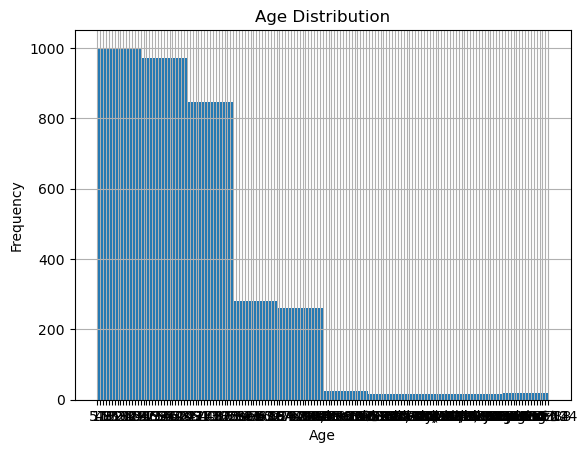

In [43]:
import matplotlib.pyplot as plt

# Crear un histograma
data['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 19. Convertimos todos los valores no númericos de esta columna a Nan y posteriormente sustituimos los Nan por la mediana ya que pudimos observar con el histograma que la distribución era sesgada y la mediana es lo mejor en estos casos.Luego checkeamos valores nulos.

In [44]:
data["Age"] = pd.to_numeric(data["Age"], errors='coerce')  # para convertir todos los valores no numéricos a NaN.
mediana = data['Age'].median()
data['Age'].fillna(mediana, inplace=True)    #sustituimos los NaN por la mediana porque la distribucion es sesgada.

In [45]:
data.isnull().sum()

CaseNumber                   0
Date                         0
Year                         0
Type                         0
Country                      0
Area                       240
Location                   314
Activity                     0
Name                         0
Sex                          0
Age                          0
Injury                       0
Fatal                        0
Time                      2942
Species                      0
Investigator or Source       0
pdf                          0
hrefformula                  1
href                         0
CaseNumber1                  0
CaseNumber2                  0
original order               0
Unnamed: 22               5873
Unnamed: 23               5872
dtype: int64

### 20.Cambiamos el nombre de las columnas Unnamed para facilitar el trabajo(creo) y cambiamos todos sus valores por Unknowns sabiemdo que esas dos columnas solo contienen nulos y revisamos.

In [46]:
data.rename(columns={'Unnamed: 22':'Unnamed22',
                        'Unnamed: 23':'Unnamed23'},
               inplace=True)

data.columns

Index(['CaseNumber', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'hrefformula', 'href', 'CaseNumber1',
       'CaseNumber2', 'original order', 'Unnamed22', 'Unnamed23'],
      dtype='object')

In [47]:
data['Unnamed22'] = data["Unnamed22"].fillna("Unknown")
data['Unnamed23'] = data["Unnamed23"].fillna("Unknown")

In [48]:
data.isnull().sum()

CaseNumber                   0
Date                         0
Year                         0
Type                         0
Country                      0
Area                       240
Location                   314
Activity                     0
Name                         0
Sex                          0
Age                          0
Injury                       0
Fatal                        0
Time                      2942
Species                      0
Investigator or Source       0
pdf                          0
hrefformula                  1
href                         0
CaseNumber1                  0
CaseNumber2                  0
original order               0
Unnamed22                    0
Unnamed23                    0
dtype: int64

### 21. Hacemos lo mismo con la columna 'hrefformula' y 'time'.


In [49]:
data['hrefformula'] = data["hrefformula"].fillna("Unknown")

In [50]:
data.isnull().sum()

CaseNumber                   0
Date                         0
Year                         0
Type                         0
Country                      0
Area                       240
Location                   314
Activity                     0
Name                         0
Sex                          0
Age                          0
Injury                       0
Fatal                        0
Time                      2942
Species                      0
Investigator or Source       0
pdf                          0
hrefformula                  0
href                         0
CaseNumber1                  0
CaseNumber2                  0
original order               0
Unnamed22                    0
Unnamed23                    0
dtype: int64

In [51]:
data['Time'] = data["Time"].fillna("Unknown")

In [52]:
data.isnull().sum()

CaseNumber                  0
Date                        0
Year                        0
Type                        0
Country                     0
Area                      240
Location                  314
Activity                    0
Name                        0
Sex                         0
Age                         0
Injury                      0
Fatal                       0
Time                        0
Species                     0
Investigator or Source      0
pdf                         0
hrefformula                 0
href                        0
CaseNumber1                 0
CaseNumber2                 0
original order              0
Unnamed22                   0
Unnamed23                   0
dtype: int64

### 22.Asignamos valores de la column country tanto a la columna Area como a Location.

In [53]:
data['Area'] = data["Country"].fillna("Unknown")               #Asignamos valores de la columna Country tanto a la columna Area como location ya que la columna Country no tiene NaN y esta relacionada con ambas
data['Location'] = data["Country"].fillna("Unknown")

In [54]:
data.isnull().sum()

CaseNumber                0
Date                      0
Year                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Name                      0
Sex                       0
Age                       0
Injury                    0
Fatal                     0
Time                      0
Species                   0
Investigator or Source    0
pdf                       0
hrefformula               0
href                      0
CaseNumber1               0
CaseNumber2               0
original order            0
Unnamed22                 0
Unnamed23                 0
dtype: int64

### 22. Imprimimos la figura y nos cercioramos de que no se ven nulos.


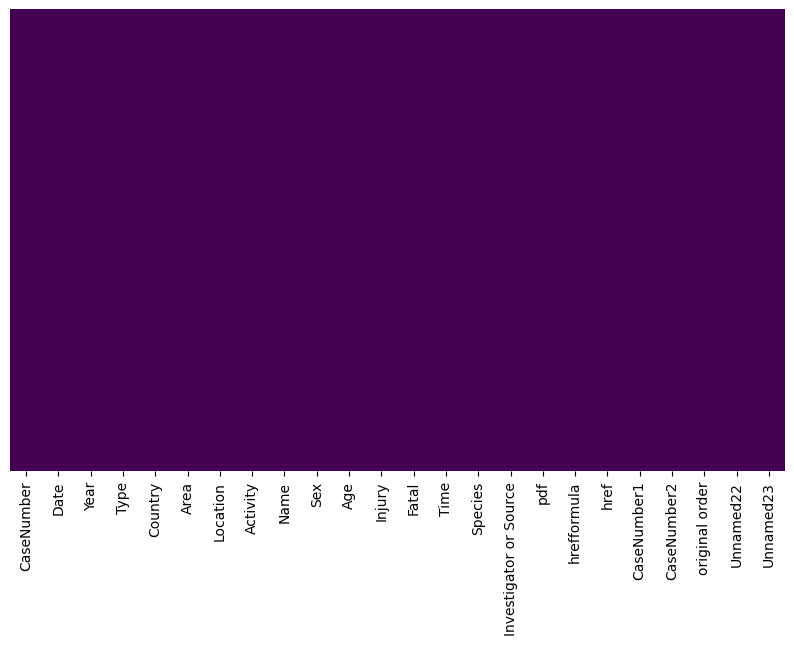

In [55]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [56]:
data.head(20)

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,hrefformula,href,CaseNumber1,CaseNumber2,original order,Unnamed22,Unnamed23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,USA,USA,Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",False,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Unknown,Unknown
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,USA,USA,Standing,Adyson McNeely,F,11.0,Minor injury to left thigh,False,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Unknown,Unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,USA,USA,Surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,False,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,Unknown,Unknown
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,AUSTRALIA,AUSTRALIA,Surfing,male,M,24.0,Minor injury to lower leg,False,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Unknown,Unknown
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,MEXICO,MEXICO,Free diving,Gustavo Ramos,M,24.0,Lacerations to leg & hand shark PROVOKED INCIDENT,False,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Unknown,Unknown
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,AUSTRALIA,AUSTRALIA,Kite surfing,Chris,M,24.0,"No injury, board bitten",False,Unknown,Unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,Unknown,Unknown
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,BRAZIL,BRAZIL,Swimming,Jose Ernesto da Silva,M,18.0,FATAL,True,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,Unknown,Unknown
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,USA,USA,Fishing,male,M,52.0,Minor injury to foot. PROVOKED INCIDENT,False,Unknown,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,Unknown,Unknown
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,USA,USA,Walking,Cody High,M,15.0,Lower left leg bitten,False,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,Unknown,Unknown
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,USA,USA,Standing,male,M,12.0,Minor injury to foot,False,14h00,Unknown,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,Unknown,Unknown


In [57]:
#FIJAR UN OBJETIVO
#Tiburón más letal

In [58]:
data = data[['Date', 'Year', 'Type', 'Country','Activity', 'Sex', 'Fatal', 'Species', 'Investigator or Source', 'pdf', 'Injury']]
display(data.head())

,Date,Year,Type,Country,Activity,Sex,Fatal,Species,Investigator or Source,pdf,Injury
0,25-Jun-2018,2018.0,Boating,USA,Paddling,F,False,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,"No injury to occupant, outrigger canoe and pad..."
1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,F,False,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,Minor injury to left thigh
2,09-Jun-2018,2018.0,Invalid,USA,Surfing,M,False,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,Injury to left lower leg from surfboard skeg
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,M,False,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,Minor injury to lower leg
4,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,M,False,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,Lacerations to leg & hand shark PROVOKED INCIDENT


In [59]:
attacks = data.groupby(["Fatal"]).agg({"Fatal":"count"})
attacks = attacks.rename(columns={"Fatal": "count"})
attacks = attacks.sort_values("count", ascending=False)
print(attacks.sum())
attacks

count    5874
dtype: int64


,count
Fatal,
False,4144
True,1237
Unknown,493


In [60]:
gender = data.groupby(["Sex"]).agg({"Sex":"count"})
gender = gender.rename(columns={"Sex": "count"})
gender = gender.sort_values("count", ascending=False)
print(gender.sum())
gender

count    5874
dtype: int64


,count
Sex,
M,4905
F,627
Unknown,337
M,2
.,1
N,1
lli,1


In [61]:
data['Type'] = data['Type'].str.replace(r'^Boat.*', 'Boat', regex=True)
data['Type'] = data['Type'].str.replace(r'^Sea.*', 'Unprovoked', regex=True)

In [62]:
cause = data.groupby(["Type"]).agg({"Type":"count"})  #meter en unknkown el resto
cause = cause.rename(columns={"Type": "count"})
cause = cause.sort_values("count", ascending=False)
print(cause.sum())
cause


count    5874
dtype: int64


,count
Type,
Unprovoked,4550
Provoked,560
Invalid,459
Boat,302
Questionable,2
Unknown,1


In [63]:
data['Species'].head(20)

0                         White shark
1                             Unknown
2                             Unknown
3                           2 m shark
4                     Tiger shark, 3m
5                             Unknown
6                         Tiger shark
7                     Lemon shark, 3'
8                      Bull shark, 6'
9                             Unknown
10                    Grey reef shark
11                            Unknown
12                            Unknown
13                   Invalid incident
14              Tawny nurse shark, 2m
15                            Unknown
16    Shark involvement not confirmed
17                            Unknown
18                        Tiger shark
19                            Unknown
Name: Species, dtype: object

In [64]:
data['Species'].value_counts().head(20)

Unknown                                               2523
White shark                                            158
Invalid                                                 88
Shark involvement prior to death was not confirmed      83
Shark involvement not confirmed                         82
Tiger shark                                             73
Bull shark                                              52
Shark involvement prior to death unconfirmed            47
4' shark                                                40
6' shark                                                39
1.8 m [6'] shark                                        35
1.5 m [5'] shark                                        32
Questionable                                            28
Questionable incident                                   27
1.2 m [4'] shark                                        26
3' shark                                                26
5' shark                                                

In [65]:
data['Species'] = data['Species'].str.replace(r'^Shark.*', 'Unknown', regex=True)
data['Species'] = data['Species'].str.replace(r'^Quest.*', 'Unknown', regex=True)
data['Species'] = data['Species'].str.replace(r'^White.*', 'White shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^white.*', 'White shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Tiger.*', 'Tiger shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Bull.*', 'Bull shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Wobbegong.*', 'Wobbebong shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^[0-9].*', 'Unknown', regex=True)
data['Species'] = data['Species'].str.replace(r'^Blue.*', 'Blue shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Nurse.*', 'Nurse shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Blacktip.*', 'Blacktip shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Bronze.*', 'Bronze whaler shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Raggedtooth.*', 'Raggedtooth shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Grey.*', 'Nurse shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Zambesi.*', 'Zambesi shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Lemon.*', 'Lemon shark', regex=True)
data['Species'] = data['Species'].str.replace(r'^Hammerhead.*', 'Hammerhead shark', regex=True)

#data['Species'] = data['Species'].str.replace(r'^.*shark$', 'Unknown', regex=True)


In [66]:
species_table = pd.crosstab(index=data['Species'], columns=data['Fatal'])
print(species_table)

Fatal                                               False  True  Unknown
Species                                                                 
                                                        4     1        1
 "gummy" shark (Rhizoprionodon or Loxodon) 1.2 ...      1     0        0
 1.5 m [5'] dusky shark                                 1     0        0
 6' to 8' shark                                         1     0        0
 Blacktip shark, C. maculipinnis. 1.9 m to 2.1 ...      1     0        0
...                                                   ...   ...      ...
small sharks'                                           0     1        0
unknown, possibly a white shark                         1     0        0
whaler shark                                            1     0        0
small brown shark                                     1     0        0
                                                        2     0        0

[451 rows x 3 columns]


In [67]:
data['Species'].value_counts().head(20)

Unknown                 3982
White shark              430
Tiger shark              234
Bull shark               127
Nurse shark               97
Invalid                   88
Bronze whaler shark       60
Blacktip shark            48
Wobbebong shark           47
Raggedtooth shark         42
Blue shark                37
Lemon shark               31
Hammerhead shark          23
No shark involvement      19
Zambesi shark             18
"a small shark"           13
Mako shark                11
a small shark              9
"small shark"              8
Unidentified species       8
Name: Species, dtype: int64

In [68]:
data.loc[data['Species'].isin(['White shark', 'Tiger shark', 'Bull shark', 'Wobbegong shark', 'No shark involvement'])]

,Date,Year,Type,Country,Activity,Sex,Fatal,Species,Investigator or Source,pdf,Injury
0,25-Jun-2018,2018.0,Boat,USA,Paddling,F,False,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,"No injury to occupant, outrigger canoe and pad..."
4,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,M,False,Tiger shark,A .Kipper,2018.06.04-Ramos.pdf,Lacerations to leg & hand shark PROVOKED INCIDENT
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Swimming,M,True,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,FATAL
8,26-May-2018,2018.0,Unprovoked,USA,Walking,M,False,Bull shark,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,Lower left leg bitten
18,28-Apr-2018,2018.0,Unprovoked,COSTA RICA,Scuba diving,M,False,Tiger shark,Costa Rica Star. 4/28/2018,2018.04.28.b-CostaRica.pdf,"No injury, shark bit scuba gear"
...,...,...,...,...,...,...,...,...,...,...,...
6244,Before 1960,0.0,Unprovoked,BAHAMAS,Unknown,M,False,White shark,"Star-Ledger (Newark, NJ), 8/22/1960",ND-0062-Spongediver-Andros.pdf,Lower leg and forearm severed
6245,Before 19-Jun-1959,0.0,Unprovoked,USA,Unknown,F,False,White shark,"B. Walton, Sun (San Bernardino), 6/19/1959",ND-0060-Capistrano.pdf,Leg injured
6253,Before 1957,0.0,Unprovoked,NICARAGUA,Lashing logs together when he fell into the water,M,True,Bull shark,"F. Poli, pp.150-153",ND-0052-NicaraguanIndian.pdf,"FATAL, leg severed"
6265,1941-1942,0.0,Unprovoked,IRAQ,Swimming,M,True,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0038-Shatt-al-Arab.pdf,"FATAL, left leg bitten with severe blood loss"


In [69]:
data['Fatal'] = data['Fatal'].apply(lambda x: True if x == 'True' else False)
data.groupby('Species')['Fatal'].sum()

Species
                                                                  0
 "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4']             0
 1.5 m [5'] dusky shark                                           0
 6' to 8' shark                                                   0
 Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7']     0
                                                                 ..
small sharks'                                                     0
unknown, possibly a white shark                                   0
whaler shark                                                      0
small brown shark                                               0
                                                                  0
Name: Fatal, Length: 451, dtype: int64